In [34]:
# Type Your full names
Student_1 = "Sara Gamal"
Student_2 = "Eman Ibrahim"

# Word Embeddings Assignment
We learnt about how to train word embeddings and how these embeddings can represent the meaning of words. Of course you don't need to train your word embeddings model every time you need to use them. In this assignment, we will use pre-trained word embeddings to see some real world usages of them. There are two types of questions in this assignment:
1. Coding questions: where you will write normal code
2. Essay questions: where you will need to write a sentence to answer the provided questions so don't forget to write the answers for this type

Let's get started.

# Predict the country from its capital
In this assignment, our main goal is to use word embeddings to predict the country given its capital just by applying some vector operations.

In [3]:

import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from utils import get_vectors

In [4]:
# load the data
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


## Loading the word embeddings
We will work with google news word embedding dataset but the original data is about 3.4 GigaBytes. To remove this problem, You will only need to work with the provided file `word_embeddings_subset.p` that contains a very small subset of the original embeddings that we will need to use in this assignment.

In [5]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
print(len(word_embeddings))
print(word_embeddings['Spain'].shape)

243
(300,)


In [38]:
################################## TODO: Answer the following questions #####################################
# Q1: What does the 243 printed above represent?
A1 = """
Write your answer here
there are 243  different words in the dictionary and each one have embedding
"""

# Q2: What does the (300,) printed above represent?
A2 = """
Write Your answer here
it represents the dimension of the embedding vector for each word
"""
#############################################################################################################

## Compute the cosine similarity
The cosine similarity between two vectors:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}$$

In [10]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    cos =None
    ############################# TODO: Compute the cosine similarity ####################################
    cos = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

    ######################################################################################################
    return cos

In [11]:
king = word_embeddings['king']
queen = word_embeddings['queen']
print(cosine_similarity(king, queen))
assert cosine_similarity(king, queen) - 0.6510956 < 1e-6, "Cosine Similarity Error"

0.6510956


## Finding the country of each capital

Now, you  will use the previous function to compute similarities between vectors,
and use these to find the capital cities of countries. You will write a function that
takes in three words, and the embeddings dictionary. Your task is to find the country of 
capital cities. For example, given the following words: 

- 1: Athens 2: Greece 3: Baghdad,

your task is to predict the country 4: Iraq.

**Instructions**: 

1. To predict the country of the capital you might want to look at the *King - Man + Woman = Queen* example, and implement that scheme into a mathematical function, using the word embeddings and a similarity function.

2. Iterate over the embeddings dictionary and compute the cosine similarity score between your vector and the current word embedding.

3. You should add a check to make sure that the word you return is not any of the words that you fed into your function. Return the one with the highest score.

In [25]:
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        country: a tuple containing the word and the similarity score
    """
    ################################## TODO: Implement the following lines ######################################

    # store the city1, country 1, and city 2 in a set called group
    group = set((city1, country1, city2))

    # get embeddings of city 1
    city1_emb = embeddings[city1]

    # get embedding of country 1
    country1_emb = embeddings[country1]

    # get embedding of city 2
    city2_emb = embeddings[city2]

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = Queen
    vec = country1_emb - city1_emb + city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = embeddings[word]

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(vec, word_emb)

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word, similarity)

    #########################################################################################################

    return country

In [26]:
# Testing your function
country_test, similarity_test = get_country('Athens', 'Greece', 'Cairo', word_embeddings)
print(country_test, similarity_test, sep='\n')

Egypt
0.7626821


In [ ]:
################################### TODO: Answer The following question #############################
# Q3: Is the country predicted above is what you expected?
A3 = """
Type Yes or No
yes beacuse cairo is the capital of egypt and greece is the country of athens
"""

# Q4: Does the similarity printed above make sense? Why?
A4 = """
Type Yes or No. and the reason for your answer.
yes because the similarity is 0.7624742 which is a high value and it is close to 1
"""
#####################################################################################################

## Model Accuracy

Now you will test your new function on the dataset and check the accuracy of the model:

$$\text{Accuracy}=\frac{\text{Correct # of predictions}}{\text{Total # of predictions}}$$

**Instructions**: Write a program that can compute the accuracy on the dataset provided for you. You have to iterate over every row to get the corresponding words and feed them into you `get_country` function above. 

In [28]:
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs
    
    Output:
        accuracy: the accuracy of the model
    '''

    ################################ TODO: Implement this function ####################################
    # initialize num correct to zero
    num_correct = 0

    # loop through the rows of the dataframe
    for i, row in data.iterrows():

        # get city1
        city1 = row['city1']

        # get country1
        country1 = row['country1']

        # get city2
        city2 =  row['city2']

        # get country2
        country2 = row['country2']

        # use get_country to find the predicted country2
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        # if the predicted country2 is the same as the actual country2...
        if predicted_country2 == country2:
            # increment the number of correct by 1
            num_correct += 1

    # get the number of rows in the data dataframe (length of dataframe)
    m = len(data)

    # calculate the accuracy by dividing the number correct by m
    accuracy = num_correct/m

    ##################################################################################################
    return accuracy

In [29]:
# This cell may take about 30 seconds to run so don't worry
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


# Plotting the vectors using PCA

Now you will explore the distance between word vectors after reducing their dimension. You should have known above the dimensionality of the word embeddings. Of course we can't visualize such a high dimension of vectors so we need to use some dimensionality reduction technique to reduce the dimensions to 2 so we can visualize them. Since you studied before PCA, we will use it for our task.

In [30]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """
    X_reduced = None
    ####################### TODO: Use sklearn.decomposition.PCA to implement this function #####################
    X_reduced = PCA(n_components=n_components).fit_transform(X)
    ###########################################################################################################
    return X_reduced

In [31]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


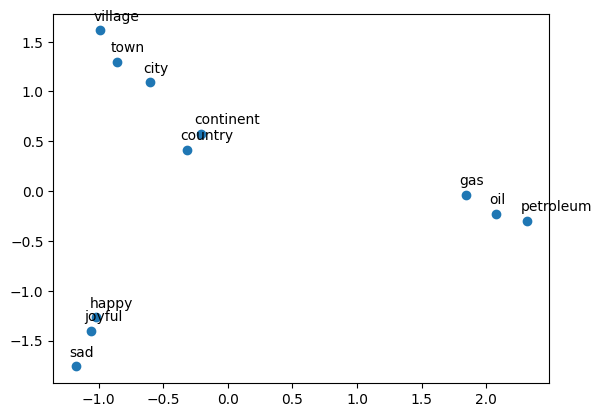

In [32]:
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

In [40]:
########################### TODO: Answer the following Question ####################################
# Q5: Does the plot above make sense?
A5 = """
Type Yes or No
yes
"""

# Q6: Illustrate the plot above
A6 = """
Type your answer here
the plot shows the relation between the words in the list and the distance between them 
the words that are close to each other in the plot are similar in meaning
(happy, joyful,sad) are close to each other in the plot
(village, town, city) are close to each other in the plot and so on
"""
####################################################################################################

In [41]:
answers = f"""
Student 1: {Student_1}
Student 2: {Student_2}

Q1:
{A1}

Q2:
{A2}

Predicted Country:
{country_test}

Predicted Similarity:
{similarity_test}

Q3:
{A3}

Q4:
{A4}

Computed Accuracy:
{accuracy}

Q5:
{A5}

Q6:
{A6}
"""

with open('answers.txt', 'w') as f:
    f.write(answers)